In [1]:
!pip install kaggle -q

In [2]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
kaggle_config = json.load(open('kaggle.json'))
kaggle_config.keys()

dict_keys(['username', 'key'])

In [4]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [5]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!ls

kaggle.json  spotify-million-song-dataset.zip
sample_data  spotify_millsongdata.csv


In [7]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("/content/spotify_millsongdata.csv")

In [9]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [10]:
df.shape

(57650, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [12]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [13]:
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [14]:
df = df.drop('link',axis=1).reset_index(drop=True)

In [15]:
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

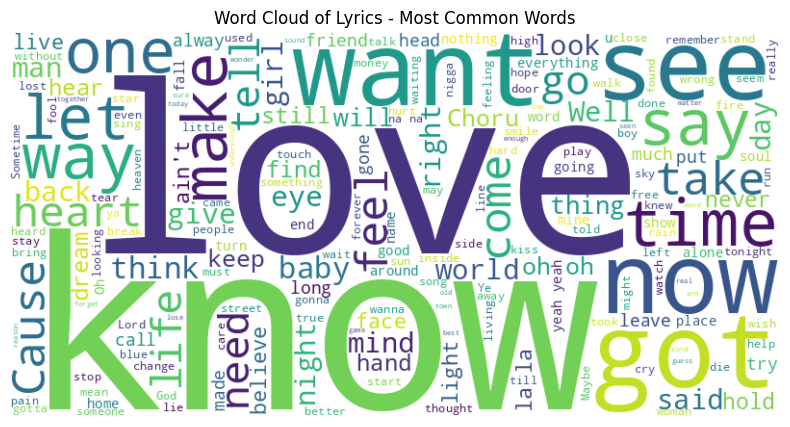

In [16]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics - Most Common Words')
plt.show()

In [17]:
# Data Preprocessing
df=df.sample(20000).reset_index(drop=True)

In [18]:
df.shape

(20000, 3)

In [19]:
df.head()

,artist,song,text
0,Raffi,Wheels On The Bus,The wheels on the bus go round and round \r\n...
1,Hillsong United,God Is Great,All creation cries to you \r\nWorshipping in ...
2,America,Pigeon Song,"Well, I had me a pigeon \r\nBy the name of Fr..."
3,Pet Shop Boys,Radiophonic,In the air \r\nIn the air \r\n \r\nThe nigh...
4,Tom Waits,Face To The Highway,I'm going away \r\nI'm going away \r\nI'm go...


In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
def preprocess_text(text):
  text = re.sub(r"[^a-zA-Z\s]","",text)
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [23]:
df["cleaned_text"]=df['text'].apply(preprocess_text)

In [24]:
df.head()

,artist,song,text,cleaned_text
0,Raffi,Wheels On The Bus,The wheels on the bus go round and round \r\n...,wheels bus go round round round round round ro...
1,Hillsong United,God Is Great,All creation cries to you \r\nWorshipping in ...,creation cries worshipping spirit truth glory ...
2,America,Pigeon Song,"Well, I had me a pigeon \r\nBy the name of Fr...",well pigeon name fred done shot head railroad ...
3,Pet Shop Boys,Radiophonic,In the air \r\nIn the air \r\n \r\nThe nigh...,air air night long crowd gone theres sunlight ...
4,Tom Waits,Face To The Highway,I'm going away \r\nI'm going away \r\nI'm go...,im going away im going away im going away im g...


In [25]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [26]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [27]:
def recommend_songs(song_name,cosine_sim=cosine_sim,df=df,top_n=5):
  idx = df[df['song'].str.lower()==song_name.lower()].index
  if len(idx)==0:
    return "Song not found in dataset!"
  idx = idx[0]

  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)
  sim_scores = sim_scores[1:top_n+1]

  song_indices = [i[0] for i in sim_scores]

  return df[['artist','song']].iloc[song_indices]


In [28]:
df["song"][2]

'Pigeon Song'

In [29]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
               artist                         song
14673         Roxette      For The Very First Time
12684     Rod Stewart           For The First Time
952    Lynyrd Skynyrd           You Got That Right
18546    Howard Jones  Let Me Be The First To Know
16371  Jennifer Lopez                  I Need Love
